## **Titanic Survival Prediction**

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2. Đọc dữ liệu

In [2]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col = 'PassengerId')

In [3]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


## 3. Chia biến X, y

Chuyển đổi DataFrame hiện tại thành array và tách hai biến X, y

In [4]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

In [5]:
dataset_arr

array([[ 3.,  0., 22., ...,  0.,  0.,  0.],
       [ 1.,  1., 38., ...,  1.,  1.,  1.],
       [ 3.,  1., 26., ...,  0.,  2.,  1.],
       ...,
       [ 3.,  1., 28., ...,  0.,  2.,  0.],
       [ 1.,  0., 26., ...,  1.,  0.,  1.],
       [ 3.,  0., 32., ...,  2.,  0.,  0.]])

## 4. Thêm bias vào X

Khi triển khai lại từ đầu, cần phải tự thêm bias vào mỗi mẫu dữ liệu nhằm thỏa mãn công thức hàm dự đoán

In [6]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis = 1)

## 5. Chia tập train, val, test

In [7]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size = val_size, random_state = random_state, shuffle = is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = test_size, random_state = random_state, shuffle = is_shuffle)

## 6. Chuẩn hóa dữ liệu

Sử dụng X_train ở trên fit vào hàm chuẩn hóa StandardScaler, sau đó đem scaler này chuẩn hóa cho tập X_val và X_test(bỏ qua cột đầu tiên trong X vì không chuẩn hóa bias)

In [8]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

## 7. Cài đặt các hàm quan trọng

Hàm sigmoid

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Hàm dự đoán

In [10]:
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)

    return y_hat

Hàm tính loss

In [11]:
def compute_loss(y_hat, y):
  y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
  return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

Hàm tính gradient

In [12]:
def compute_gradient(X, y, y_hat):
  return np.dot(X.T, (y_hat - y)) / y.size

Hàm cập nhật trọng số

In [13]:
def update_theta(theta, gradient, lr):
  return theta - lr * gradient

Hàm tính độ chính xác

In [14]:
def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta).round()
  acc = (y_hat == y).mean()

  return acc

## 8. Khai báo các siêu tham số và khởi tạo weights

In [15]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size = X_train.shape[1])

## 9. Huấn luyện mô hình

In [16]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)


        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)
    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')



EPOCH 1:	Training loss: 0.703	Validation loss: 0.599

EPOCH 2:	Training loss: 0.670	Validation loss: 0.582

EPOCH 3:	Training loss: 0.640	Validation loss: 0.567

EPOCH 4:	Training loss: 0.614	Validation loss: 0.555

EPOCH 5:	Training loss: 0.592	Validation loss: 0.544

EPOCH 6:	Training loss: 0.572	Validation loss: 0.535

EPOCH 7:	Training loss: 0.554	Validation loss: 0.528

EPOCH 8:	Training loss: 0.539	Validation loss: 0.522

EPOCH 9:	Training loss: 0.526	Validation loss: 0.517

EPOCH 10:	Training loss: 0.514	Validation loss: 0.513

EPOCH 11:	Training loss: 0.504	Validation loss: 0.509

EPOCH 12:	Training loss: 0.495	Validation loss: 0.507

EPOCH 13:	Training loss: 0.487	Validation loss: 0.505

EPOCH 14:	Training loss: 0.480	Validation loss: 0.503

EPOCH 15:	Training loss: 0.474	Validation loss: 0.502

EPOCH 16:	Training loss: 0.468	Validation loss: 0.501

EPOCH 17:	Training loss: 0.463	Validation loss: 0.500

EPOCH 18:	Training loss: 0.459	Validation loss: 0.500

EPOCH 19:	Training

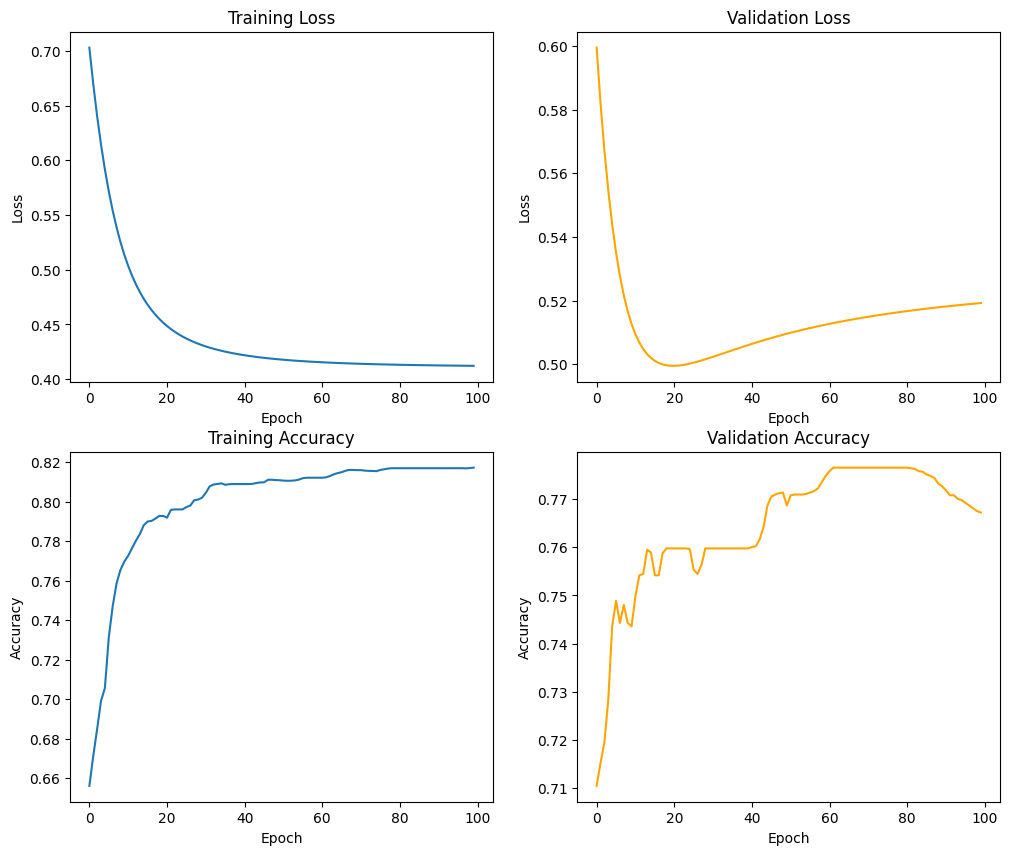

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(12 , 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

## 10. Đánh giá mô hình

In [18]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: { val_set_acc }')
print(f'Accuracy : { test_set_acc }')

Evaluation on validation and test set:
Accuracy: 0.770949720670391
Accuracy : 0.7752808988764045


## **Twitter Sentiment Analysis**

## 1. Import libraries

In [19]:
import pandas as pd
import numpy as np

import re
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

## 2. Đọc bộ dữ liệu

In [20]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(dataset_path, index_col = 'id')

In [21]:
df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


## 3. Tiền xử lý bộ dữ liệu

Xây dựng hàm chuẩn hóa văn bản

In [26]:
def text_normalize(text):
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text)
    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # Hashtags removal
    text = re.sub(r'#', '', text)
    # Punctuation removal
    text = re.sub(r'[^\w\s]+', '', text)

    # Tokenization
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    text_tokens = tokenizer.tokenize(text)

    return text_tokens

Xây dựng bộ lưu giữ tần suất xuất hiện của các từ

In [27]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
      tweet = row['tweet']
      label = row['label']

      tokens = text_normalize(tweet)
      for token in tokens:
        pair = (token, label)
        freqs[pair] += 1
    return freqs

Xây dựng hàm tạo vector đặc trưng

In [29]:
def get_feature(text, freqs):
  tokens = text_normalize(text)

  X = np.zeros(3)
  X[0] = 1
  for token in tokens:
    X[1] += freqs[(token, 0)]
    X[2] += freqs[(token, 1)]

  return X

Trích xuất đặc trưng toàn bộ dữ liệu

In [30]:
X = []
y = []
freqs = get_freqs(df)
for idx, row in df.iterrows():
  tweet = row['tweet']
  label = row['label']

  X_i = get_feature(tweet, freqs)
  X.append(X_i)
  y.append(label)

X = np.array(X)
y = np.array(y)

## 4. Chia bộ train, val, test

In [31]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = val_size, random_state = random_state, shuffle = is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = test_size, random_state = random_state, shuffle = is_shuffle)

## 5. Chuẩn hóa dữ liệu

In [32]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

## 6. Cài đặt các hàm quan trọng

In [33]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)

    return y_hat
def compute_loss(y_hat, y):
  y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
  return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
def compute_gradient(X, y, y_hat):
  return np.dot(X.T, (y_hat - y)) / y.size
def update_theta(theta, gradient, lr):
  return theta - lr * gradient
def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta).round()
  acc = (y_hat == y).mean()

  return acc

## 7. Khai báo các siêu tham số và khởi tạo weights

In [34]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(size = X_train.shape[1])

## 8. Huấn luyện mô hình

In [35]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)


        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)
    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')



EPOCH 1:	Training loss: 0.707	Validation loss: 0.704

EPOCH 2:	Training loss: 0.661	Validation loss: 0.659

EPOCH 3:	Training loss: 0.624	Validation loss: 0.622

EPOCH 4:	Training loss: 0.594	Validation loss: 0.591

EPOCH 5:	Training loss: 0.569	Validation loss: 0.566

EPOCH 6:	Training loss: 0.548	Validation loss: 0.546

EPOCH 7:	Training loss: 0.531	Validation loss: 0.528

EPOCH 8:	Training loss: 0.516	Validation loss: 0.514

EPOCH 9:	Training loss: 0.504	Validation loss: 0.502

EPOCH 10:	Training loss: 0.494	Validation loss: 0.491

EPOCH 11:	Training loss: 0.485	Validation loss: 0.483

EPOCH 12:	Training loss: 0.477	Validation loss: 0.475

EPOCH 13:	Training loss: 0.471	Validation loss: 0.468

EPOCH 14:	Training loss: 0.465	Validation loss: 0.463

EPOCH 15:	Training loss: 0.460	Validation loss: 0.457

EPOCH 16:	Training loss: 0.456	Validation loss: 0.453

EPOCH 17:	Training loss: 0.452	Validation loss: 0.449

EPOCH 18:	Training loss: 0.448	Validation loss: 0.445

EPOCH 19:	Training

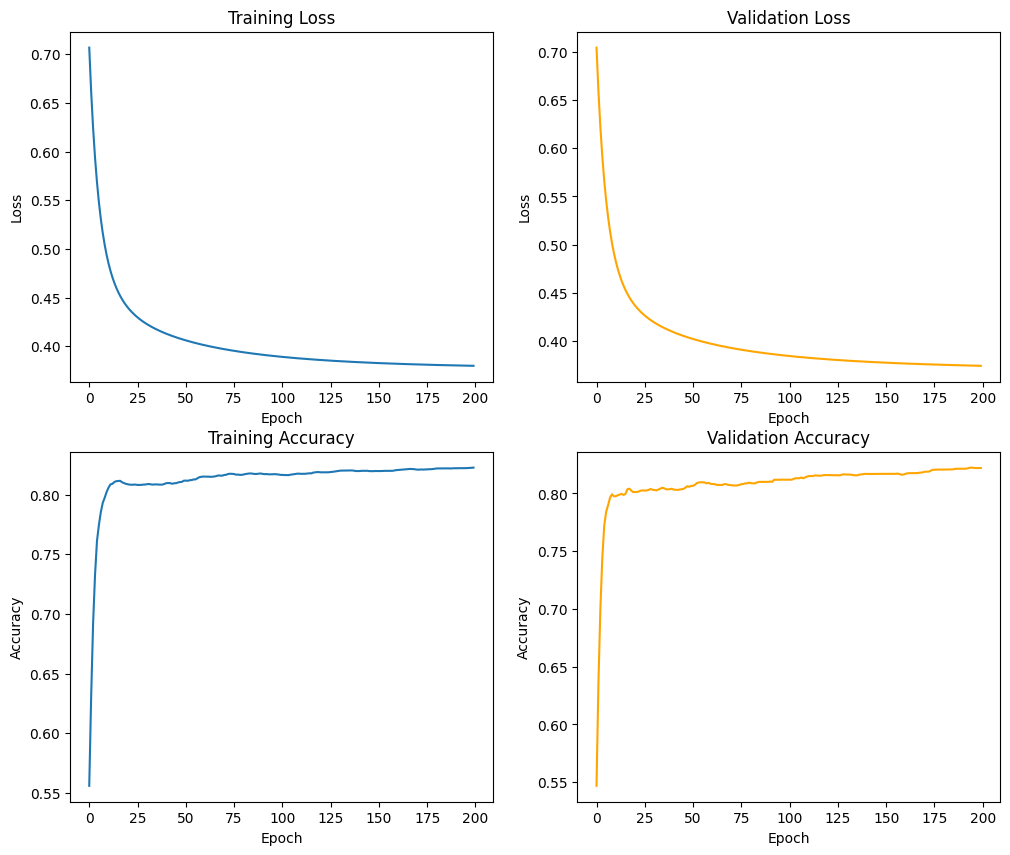

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(12 , 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

## 9. Đánh giá mô hình

In [37]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy: { val_set_acc }')
print(f'Accuracy : { test_set_acc }')

Evaluation on validation and test set:
Accuracy: 0.821969696969697
Accuracy : 0.8434343434343434
